In [121]:
import getFamaFrenchFactors as gff
df_ff3_monthly = gff.famaFrench3Factor(frequency='m')
df_ff3_monthly.set_index('date_ff_factors', inplace=True)

In [122]:
df_ff3_monthly.tail(10)

,Mkt-RF,SMB,HML,RF
date_ff_factors,,,,
2022-09-30,-0.0935,-0.0079,0.0006,0.0019
2022-10-31,0.0783,0.0009,0.0805,0.0023
2022-11-30,0.0460,-0.0340,0.0138,0.0029
2022-12-31,-0.0641,-0.0068,0.0132,0.0033
2023-01-31,0.0665,0.0502,-0.0405,0.0035
2023-02-28,-0.0258,0.0121,-0.0078,0.0034
2023-03-31,0.0251,-0.0559,-0.0901,0.0036
2023-04-30,0.0061,-0.0334,-0.0003,0.0035
2023-05-31,0.0035,0.0153,-0.0780,0.0036


Cumulative Return: 219.53%	
Mean Annual Return: 2.26%	
Annualised Volatility: 10.98%	
Annual Sharpe Ratio: 0.21


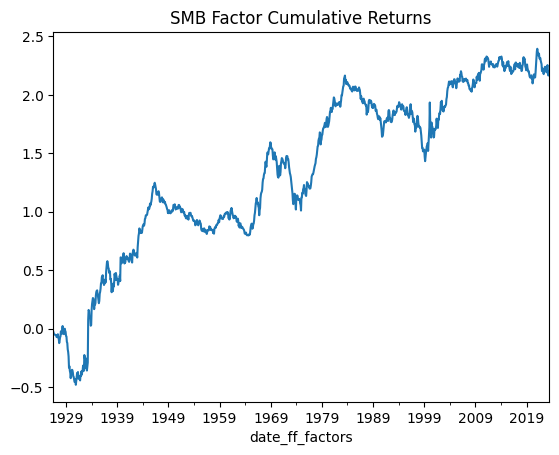

In [130]:
# Filter on the SMB column and plot a cumulative return line chart
df_size = df_ff3_monthly['SMB']
df_size.cumsum().plot(title='SMB Factor Cumulative Returns')

# Print some performance metrics
annual_volatility = df_size.std()*(12**0.5)
mean_annualized_return = df_size.mean()*12
print(f"Cumulative Return: {round(df_size.sum()*100, 2)}%\
	\nMean Annual Return: {round(mean_annualized_return*100, 2)}%\
	\nAnnualised Volatility: {round(annual_volatility*100, 2)}%\
	\nAnnual Sharpe Ratio: {round(mean_annualized_return/annual_volatility, 2)}")

In [1]:
def show_me_factor_info(factor, df):
	df_single_factor = df[factor]
	df_single_factor.cumsum().plot(title='{} Factor Cumulative Returns'.format(factor))
	annual_volatility = df_single_factor.std()*(12**0.5)
	mean_annualized_return = df_single_factor.mean()*12
	print(f"Cumulative Return: {round(df_single_factor.sum()*100, 2)}%\
		\nMean Annual Return: {round(mean_annualized_return*100, 2)}%\
		\nAnnualised Volatility: {round(annual_volatility*100, 2)}%\
		\nAnnual Sharpe Ratio: {round(mean_annualized_return/annual_volatility, 2)}")

Cumulative Return: 395.84%		
Mean Annual Return: 4.08%		
Annualised Volatility: 12.38%		
Annual Sharpe Ratio: 0.33


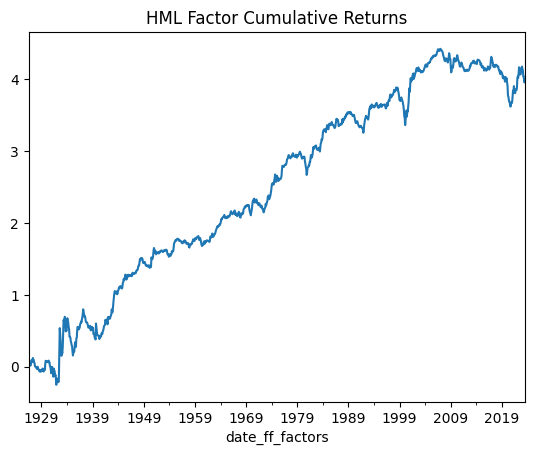

In [132]:
show_me_factor_info('HML', df_ff3_monthly)

Cumulative Return: 726.44%		
Mean Annual Return: 7.53%		
Annualised Volatility: 16.31%		
Annual Sharpe Ratio: 0.46


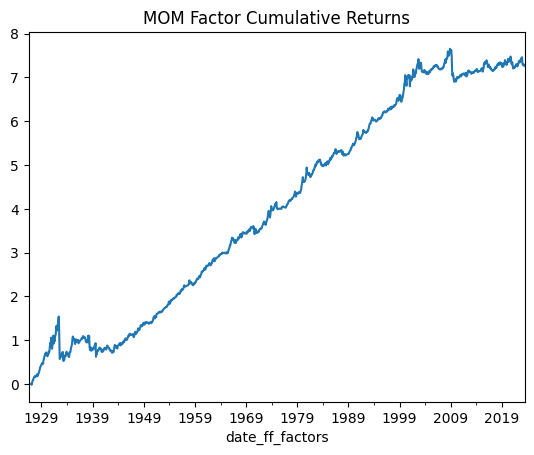

In [133]:
df_c4f_monthly = gff.carhart4Factor(frequency='m')
df_c4f_monthly.set_index('date_ff_factors', inplace=True)
show_me_factor_info('MOM', df_c4f_monthly)

<AxesSubplot: title={'center': 'MOM Max Drawdown in %'}, xlabel='date_ff_factors'>

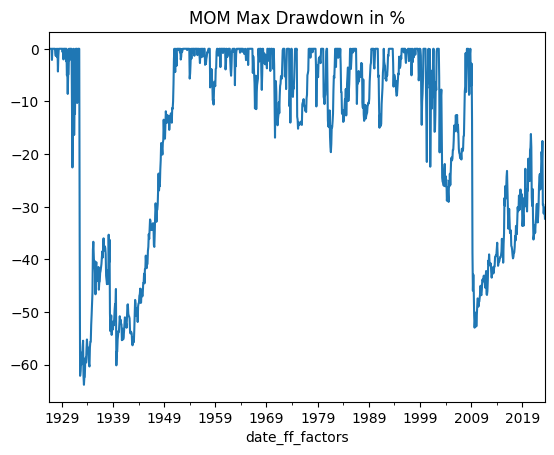

In [134]:
## Turn Log Returns into Simple Returns
import numpy as np
mom_simple_returns = (np.exp(df_c4f_monthly['MOM'])).fillna(1)
cumulative_reinvested_return = mom_simple_returns.cumprod()

# Plot the Max Drawdown time series
((cumulative_reinvested_return - cumulative_reinvested_return.expanding().max())/
(cumulative_reinvested_return.expanding().max())*100).plot(title='MOM Max Drawdown in %')

Cumulative Return: 204.1%		
Mean Annual Return: 3.4%		
Annualised Volatility: 7.69%		
Annual Sharpe Ratio: 0.44


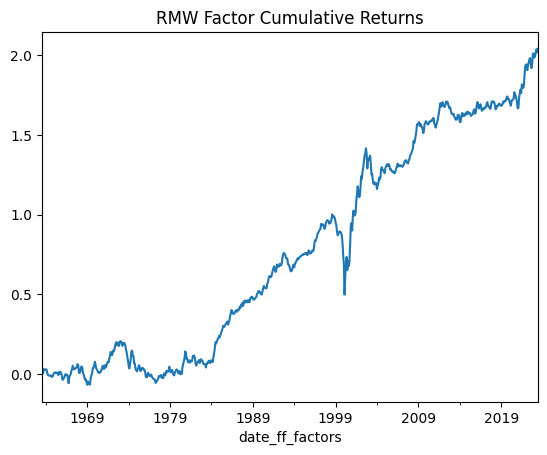

In [135]:
df_ff5f_monthly = gff.famaFrench5Factor(frequency='m')
df_ff5f_monthly.set_index('date_ff_factors', inplace=True)
show_me_factor_info('RMW', df_ff5f_monthly)

Cumulative Return: 200.32%		
Mean Annual Return: 3.34%		
Annualised Volatility: 7.21%		
Annual Sharpe Ratio: 0.46


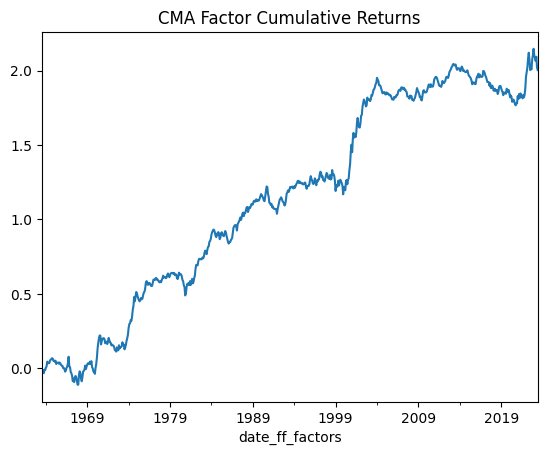

In [136]:
show_me_factor_info('CMA', df_ff5f_monthly)

<AxesSubplot: title={'center': 'CMA/RMW Returns vs. Market Returns 1999 to 2022'}, xlabel='date_ff_factors'>

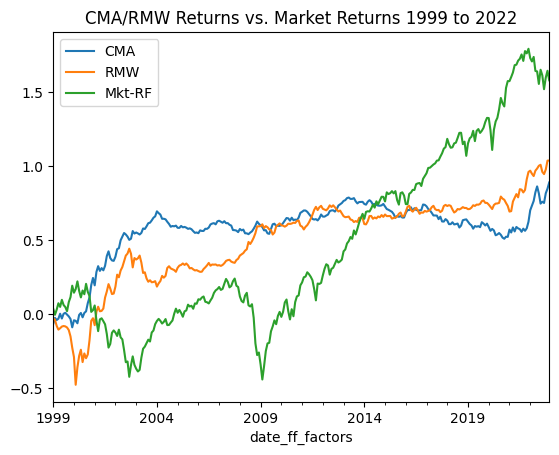

In [137]:
title = 'CMA/RMW Returns vs. Market Returns 1999 to 2022'
df_ff5f_monthly[['CMA', 'RMW', 'Mkt-RF']].loc['1999':'2022'].cumsum().plot(title=title)

In [138]:
df_ff5f_monthly[['CMA', 'RMW', 'Mkt-RF']].loc['1999':'2022'].corr()

,CMA,RMW,Mkt-RF
CMA,1.000000,0.252842,-0.264515
RMW,0.252842,1.000000,-0.349071
Mkt-RF,-0.264515,-0.349071,1.000000
